## Loading Data set

In [13]:
TRAINING_DATA_PATH = '/content/sample_data/Transaction_Naration_Data_Set.csv'

In [14]:
import pandas as pd

In [15]:
data = pd.read_csv(TRAINING_DATA_PATH)

In [16]:
data

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.00,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.00,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.00,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.00,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.00,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
...,...,...,...,...,...,...
22546753,22546753,4010919,2550.00,29-APR-23,Credit Against Merchant Cash Withdraw Service ...,Credit
22546754,22546754,2607145,2550.00,29-APR-23,"Cash withdraw from Micro Merchant point, MM A/C",Debit
22546755,22546755,5728508,2550.00,29-APR-23,Credit Against Merchant Cash Withdraw Service ...,Credit
22546756,22546756,5939099,1512.75,29-APR-23,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [17]:
data.columns

Index(['Unnamed: 0', 'AC_ID', 'AMOUNT', 'DOC_DATE', 'NARATION', 'DR_CR'], dtype='object')

In [18]:
narration = data['NARATION'].to_frame()

In [19]:
narration

,NARATION
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from Micro Merchant point, MM A/C"
3,Credit Against Merchant Cash Withdraw Service ...
4,"Cash withdraw from Micro Merchant point, MM A/C"
...,...
22546753,Credit Against Merchant Cash Withdraw Service ...
22546754,"Cash withdraw from Micro Merchant point, MM A/C"
22546755,Credit Against Merchant Cash Withdraw Service ...
22546756,"Cash withdraw from Micro Merchant point, MM A/C"


In [20]:
SAMP_CNT = 20
narration.sample(n=SAMP_CNT)

,NARATION
7516450,Debit Against Palli Bidyut Bill Collection.
10668939,OBC # /
9128539,Debit Against Palli Bidyut Bill Collection.
4127412,Debit Against Palli Bidyut Bill Collection.
10568995,SMS Charge Deduction For The Year
97323,Credit Against Merchant Cash Withdraw Service ...
8666604,Cash Withdraw
21408585,"Cash withdraw from Micro Merchant point, MM A/C"
20726706,Credit Against Merchant Cash Withdraw Service ...
16291735,Debit Against Debit Card Charge Transaction


In [21]:
narration.describe()

,NARATION
count,22545735
unique,128603
top,Cash Withdrawal From A/C No.:
freq,2359719


In [22]:
unique_narrations = narration.drop_duplicates()

In [23]:
del data, narration

In [24]:
unique_narrations.sample(n=SAMP_CNT)


,NARATION
10030195,Cash Deposit for Salay Jan-
4433517,"jafor ikbal, Cheque # AD-"
18267202,Withdraw Against Cash Deposit BY SAIFUL ISLAM ...
13275777,Withdraw Against Inter Branch Cash Deposit- Md...
3541332,Adv. Shazia Afrin Lima Vara Oct
10402620,"No teota udc,-)"
19040014,Fund Transfer from kouser From A/C No.:
6397285,Chokradakanai Purbo Para
9294242,"Cash Deposit, for Office Internet Bill"
17510085,. abdul jalil dholashor sme


In [25]:
unique_narrations.rename(columns = {'NARATION' : 'text'}, inplace = True)

<ipython-input-25-8da7a7b2cb53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_narrations.rename(columns = {'NARATION' : 'text'}, inplace = True)


## Cleaning

In [26]:
df = unique_narrations.copy(deep=True)

In [27]:
def toLower(df):
  df['text'] = df['text'].apply(lambda z : str(z).lower())

def eliminateNonAlphabet(df):
  df['text'] = df['text'].str.replace(r'[^\w\s]+', ' ')
  df['text'] = df['text'].replace( r'[^A-Za-z ]+', '', regex=True)

def tokenize(df):
  import nltk
  nltk.download('punkt')
  df['text'] = df['text'].apply(nltk.word_tokenize)

def dropEmpty(df):
  df.drop(df[df['text'].map(len) == 0].index, inplace = True)

def lematize(df):
  import nltk
  from nltk.stem import WordNetLemmatizer
  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  df['text'] = df['text'].apply(lambda z : [lemmatizer.lemmatize(x) for x in z])

def removeWord(df, stop):
  df['text'] = df['text'].apply(lambda z : [word for word in z if word not in stop])

def removeGeneralStopWords(df):
  import nltk
  from nltk.corpus import stopwords
  nltk.download("stopwords")
  stop = set(stopwords.words("english"))
  removeWord(df, stop)

def showAppearances(df1, df2, text):
  return df1.loc[df2[df2['text'].map(lambda z : text in z) == True].index]

def removeDup(df):
  df.drop_duplicates(inplace = True)

# def removeEmptyTokensRows(df):
#   df.drop(df[df['text'].map(len) == 0].index, inplace = True)

def removeCustomWords(df):
  stops = ['ac', 'ae', 'md', 'akter', 'hossain', 'rahman', 'ltd', 'bazar', 'unnayan', 'dol', 'polli', 'mohila', 'ad', 'mia', 'ali', 'uddin', 
         'begum', 'tk', 'islam', 'amt', 'abdul', 'hasan', 'sonali', 'alam', 'miah', 'bangladesh' , 'per', 'taka',
         'da', 'vai', 'agrani' , 'ahmed', 'hossen', 'khan', 'abu', 'janata', 'al', 'unnayon', 'b', 'amin', 'mamun', 'khatun', 'unnoyon',  'nur', 'haque']
  notSure = ['mo', 'cap','fvg', 'islami', 'br', 'id' , 'dal', 'purush', 'nid', 'purpose', 'title', 'para', 'roll']
  months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
  removeWord(df, set(stops + notSure + months))

def replaceWord(df):
  def func(lst):
    try:
      index = lst.index('withdrawal')
      lst[index] = 'withdraw'
    except:
      None
    return lst
  df['text'] = df['text'].apply(func)

def removeNonEnglishWord(df,keep):
  import nltk
  nltk.download('words')
  from nltk.corpus import words
  wordSet = set(words.words())
  def func(row):
    r2 = []
    for w in row:
      if (len(str(w)) > 2) and ((w in wordSet) or (w in keep)):
        r2.append(w)

    return r2 

  df['text'] = df['text'].apply(func)

# def removeNonEnglishWords(df):



In [28]:
def cleanEng(df, rDup = True):
  toLower(df)
  eliminateNonAlphabet(df)
  if rDup:
    removeDup(df)
  tokenize(df)
  lematize(df)
  removeGeneralStopWords(df)
  removeCustomWords(df)
  replaceWord(df)
  removeNonEnglishWord(df, set(['eftn', 'ft', 'bkash', 'nogod', 'rtgs', 'pos', 'sme', 'mst']))
  dropEmpty(df)

In [29]:
cleanEng(df, True)
df

<ipython-input-27-b2f73e7e5f5d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', ' ')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


,text
0,"[cash, withdraw]"
1,"[cash, withdraw]"
2,"[cash, withdraw, micro, merchant, point]"
3,"[credit, merchant, cash, withdraw, service]"
6,"[cash, deposit]"
...,...
22534938,"[smart, regular, fund, transfer]"
22535747,"[smart, regular, fund, transfer, bank]"
22536483,"[cash, deposit, sme]"
22539045,"[transaction, fund, transfer, smart, regular, ..."


## Exploration After Cleaning

In [30]:
def plotFreqWords(df, n, title = 'Most Frequently Found Words in Narration', shape = (8,8)):
  import itertools
  import collections
  import pandas as pd
  import matplotlib.pyplot as plt
  lemmatized_tokens = list(df['text'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  top_words = pd.DataFrame(counts_no.most_common(n), columns = ['words', 'count'])
  fig, ax = plt.subplots(figsize=shape)
  top_words.sort_values(by='count').plot.barh(x = 'words', y = 'count', ax = ax, color = 'blue')
  ax.set_title(title)
  plt.show()


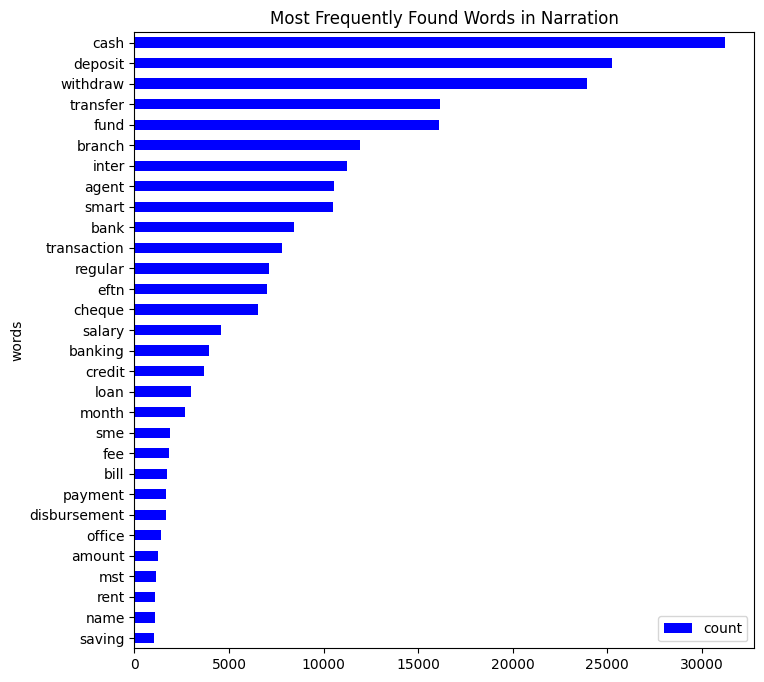

In [31]:
plotFreqWords(df, 30)

## Embedding 

In [32]:
def getEncodings(df,vectors, dim = 100):
  import numpy as np
  def getSentEmbedding(txt):
    s = np.zeros(dim)
    c = 0
    for x in txt:
      y = str(x)
      if y in vectors:
        s += vectors[y]
        c += 1
    return (s / c) if c != 0 else s

  return np.vstack(df['text'].apply(getSentEmbedding).values)

### Pre Trained w2v Functions

In [33]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
def getVectorsPre(path, limit):
  import gensim
  from gensim.models import Word2Vec
  model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True, limit = limit)
  return model


### Trained W2V functions

In [35]:
def getVectors(df, min_count = 5):
  
  import multiprocessing
  from gensim.models import Word2Vec


  texts = df.text.tolist()
  cores = multiprocessing.cpu_count()
  w2v_model = Word2Vec(sentences = texts, window = 2, vector_size = 100, min_count = min_count)
  vectors = w2v_model.wv
  return vectors


### Sentence Transformers Functions

In [36]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:

def getModel():
  from sentence_transformers import SentenceTransformer
  model = SentenceTransformer('all-MiniLM-L6-v2')
  return model
def getEncodingsST(df, model):
  sentences = df['text'].apply(lambda z : ' '.join(z)).to_list()
  return model.encode(sentences)


## Clustering

### Functions

In [38]:
def normalize(encodings):
  import numpy as np
  norm = np.linalg.norm(encodings, axis = 1, keepdims = True)
  norm[norm == 0] = 1
  norm_encodings = encodings / norm
  return norm_encodings

def cluster(df, norm_encodings, k, colName):
  from sklearn.cluster import KMeans
  from sklearn.metrics import silhouette_score
  
  kmeans = KMeans(n_clusters=k).fit(norm_encodings)
  centroids = kmeans.cluster_centers_
  cluster_assignment = kmeans.predict(norm_encodings)
  
  df[colName] = cluster_assignment
  return kmeans  

def clusterDBSCAN(df,norm_encodings, col, mn, eps):
  from sklearn.cluster import DBSCAN
  dbscan=DBSCAN(min_samples = mn, eps = eps,algorithm='ball_tree')
  clustering = dbscan.fit(norm_encodings)
  df[col] = clustering.labels_
  return clustering

In [39]:
def createFreqWordsBarPlot(df, n, title = 'Most Frequently Found Words in Narration', shape = (8,8), ax = None):
  import itertools
  import collections
  import pandas as pd
  import matplotlib.pyplot as plt
  lemmatized_tokens = list(df['text'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  top_words = pd.DataFrame(counts_no.most_common(n), columns = ['words', 'count'])
  return top_words.sort_values(by='count').plot.barh(x = 'words', y = 'count', color = 'blue', ax = ax, title=title)


In [40]:
def plotClusterFreq(df,cluster_col, k, n, shape,ws,hs, s = 0):
  from math import sqrt, ceil
  import matplotlib.pyplot as plt
  a = int(sqrt(k - s))
  b = ceil((k - s) / a)
  # print(a,b)
  if b < a:
    a += 1
  a = int(a)
  tsh = ((shape[0] + ws) * a, (shape[1] + hs) * b)

  fig, ax = plt.subplots(nrows = a, ncols = b, figsize = tsh)
  plt.subplots_adjust(wspace=ws, hspace=hs)
  for i in range(s,k):
    # print (i // b, i % b)
    createFreqWordsBarPlot(df[df[cluster_col] == i],n,f'Cluster-{i}',shape,ax[i // b][i % b])
  plt.show()


### Clusterings

#### Pre-Trained W2V

##### K means

In [41]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)

[--------------------------------------------------] 0.9% 15.3/1662.8MB downloaded

KeyboardInterrupt: ignored

In [ ]:
k = 13
col = f'{k}-means-clustering-pre-trained-w2v'
n = 7
vectors = getVectorsPre(path, 1000000)
encodings = getEncodings(df, vectors, 300)
norm_encodings = normalize(encodings)
kmeans_model = cluster(df, norm_encodings, k, col)
plotClusterFreq(df,col,k,n,(4,3), .8, .3)


##### DBSCAN

In [ ]:
dbscan_model = clusterDBSCAN(df, norm_encodings, col, 100, .1)
plotClusterFreq(df,col,k,n,(4,3), .8, .3)

#### Trained W2V

##### k means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


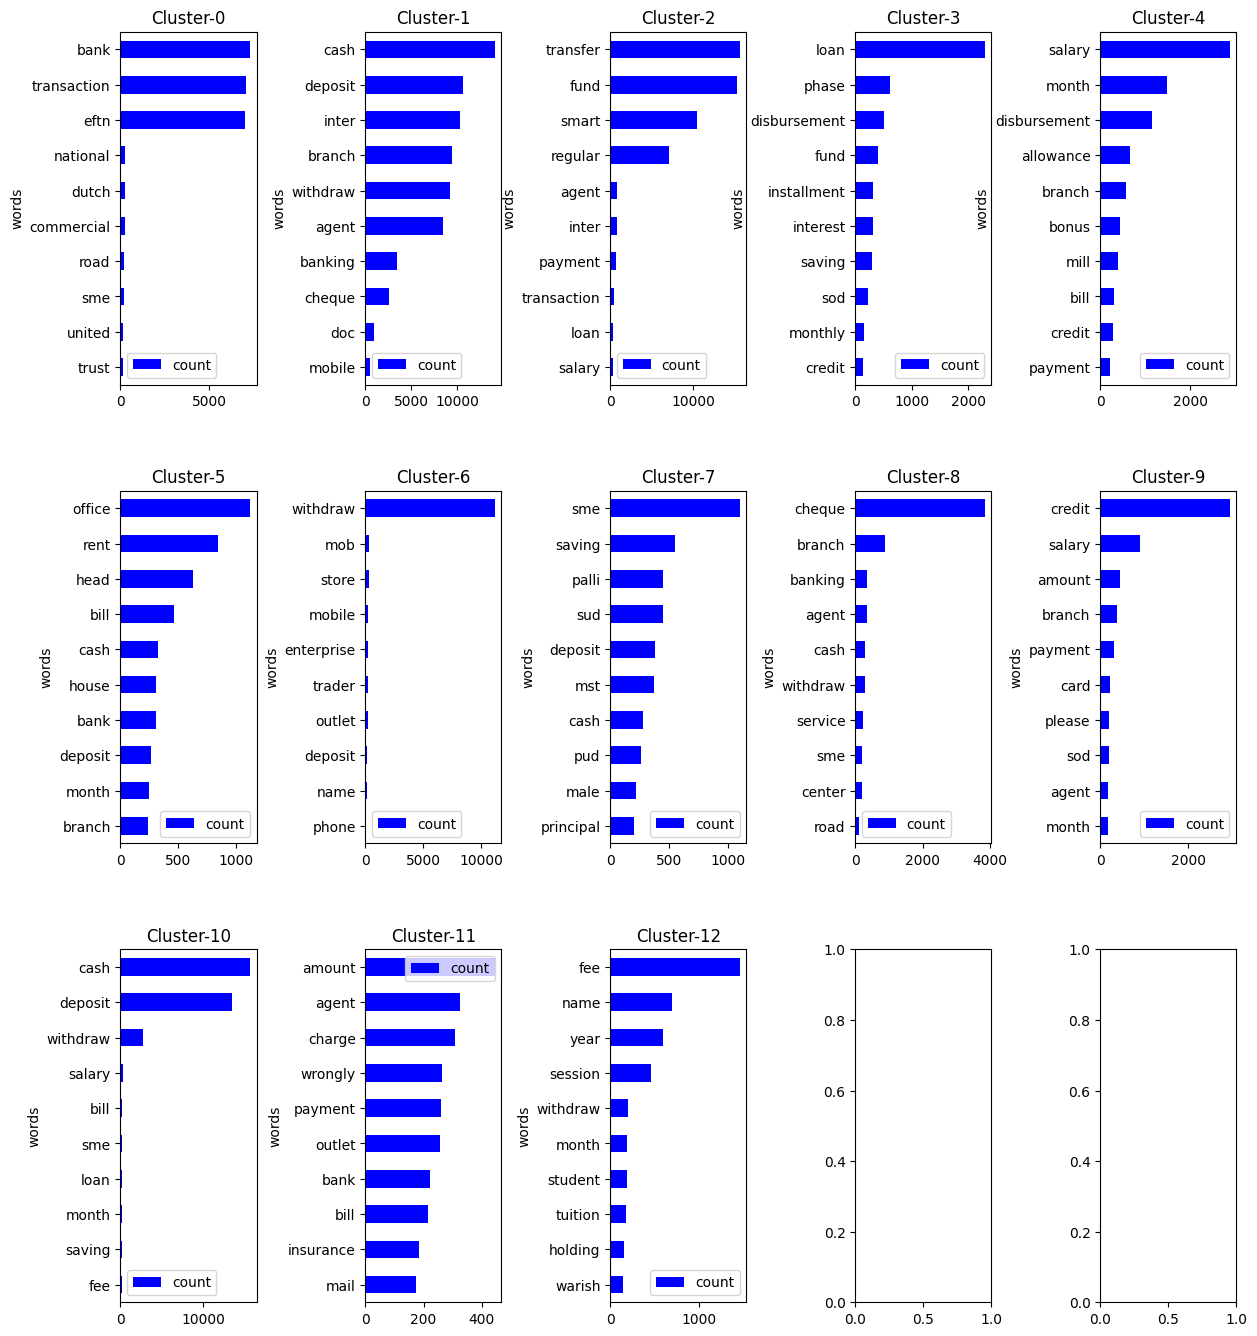

In [51]:
k = 13
col = f'{k}-means-clustering-trained-w2v'
n = 10
vectors = getVectors(df, 1)
encodings = getEncodings(df, vectors)
norm_encodings = normalize(encodings)
kmeans_model = cluster(df, norm_encodings, k, col)
plotClusterFreq(df,col,k,n,(4,3), .8, .3)

##### DBSCAN

In [ ]:
dbscan_model = clusterDBSCAN(df, norm_encodings, col, 100, .1)
plotClusterFreq(df,col,k,n,(4,3), .8, .3)

#### Sentence Transformers

##### kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


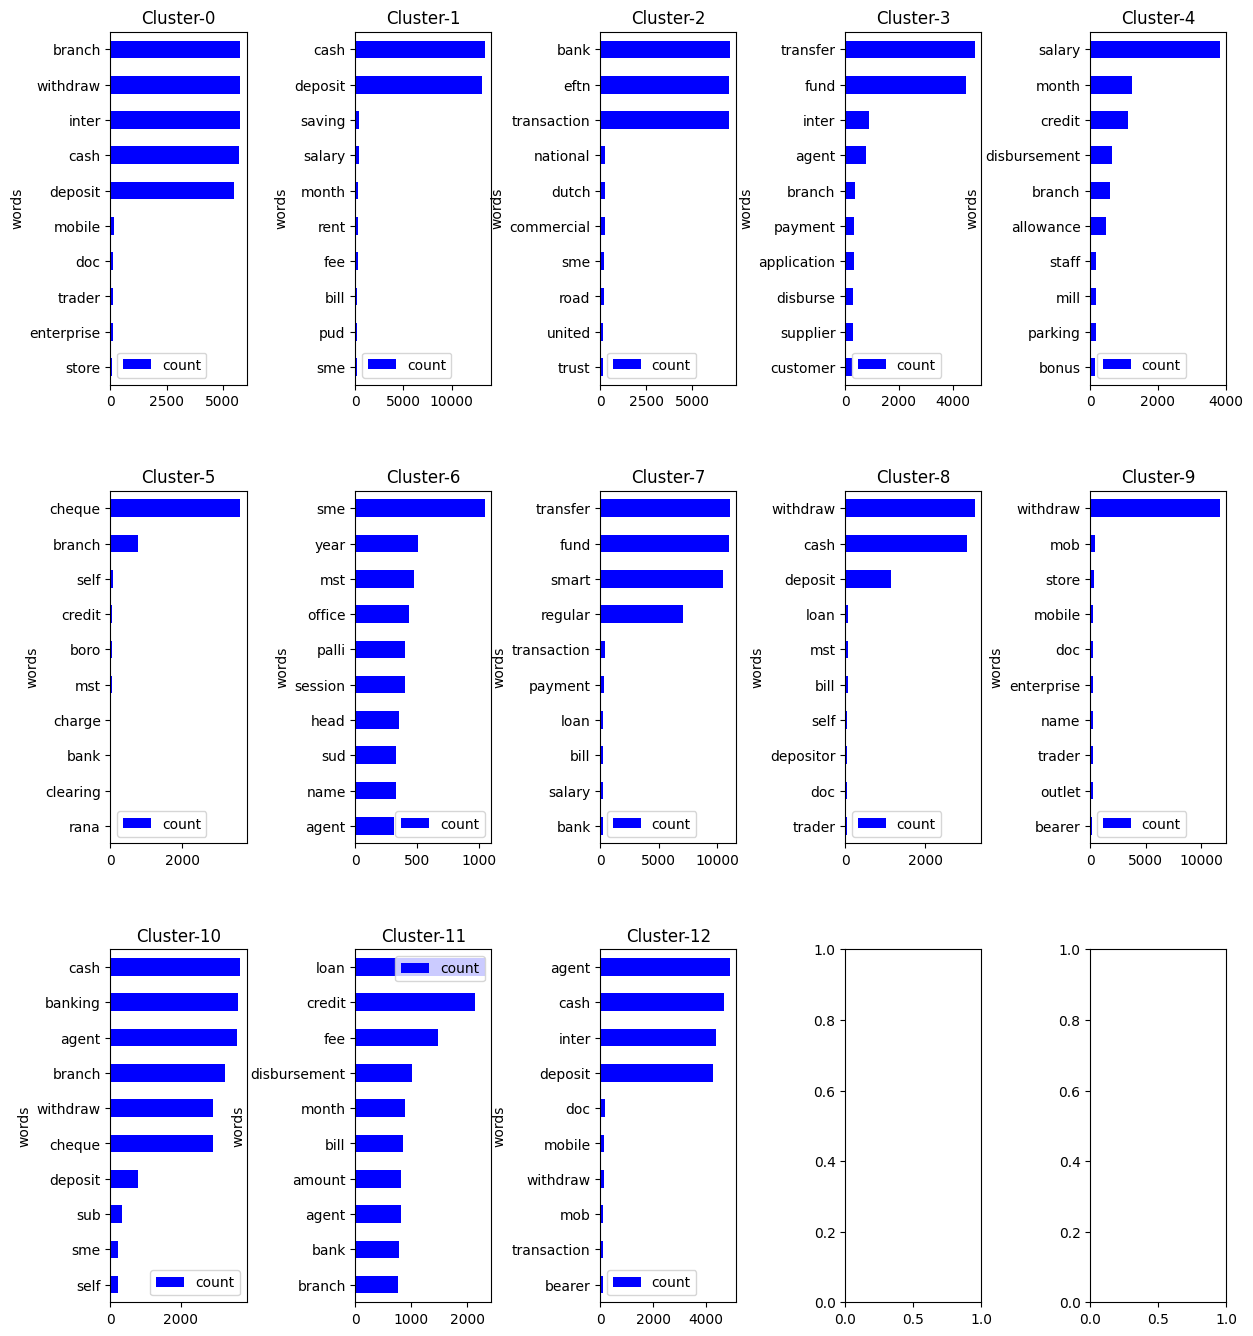

In [44]:
k = 13
col = f'{k}-means-clustering-sentence-transformer'
model = getModel()
encodings = getEncodingsST(df, model)
norm_encodings = normalize(encodings)
kmeans_model = cluster(df, norm_encodings, k, col)
plotClusterFreq(df,col,k,n,(4,3), .8, .3)

##### DBSCAN

In [ ]:
dbscan_model = clusterDBSCAN(df, norm_encodings, col, 100, .1)
plotClusterFreq(df,col,k,n,(4,3), .8, .3)

## Test

In [45]:
testPath = '/content/drive/MyDrive/Test.xlsx'
import pandas as pd
testDf = pd.read_excel(testPath)
testDf.drop([0, '0.1', '0.2', '0.3', '0.5'],axis = 1,inplace = True)
testDf.rename(columns = {'0.4' : 'text', '0.6' : 'cluster'}, inplace = True)

In [46]:
tdf = testDf.copy(deep = True)

In [47]:
cleanEng(tdf, True)

<ipython-input-27-b2f73e7e5f5d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', ' ')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [48]:
def getPredictionW2V(df, vectors, kmeans_model, dim):
  encodings = getEncodings(df, vectors, dim)
  norm_encodings = normalize(encodings)
  return kmeans_model.predict(norm_encodings)

In [49]:
def getPredictionST(df,sent_model,clustering_model):
  encodings = getEncodingsST(df, sent_model)
  norm_encodings = normalize(encodings)
  return clustering_model.predict(norm_encodings)

In [52]:
for i in range(1, 15):
  print(i, getPredictionW2V(tdf[tdf['cluster'] == i], vectors, kmeans_model, 100))

1 [10 10  1 10]
2 [10 10]
3 [11]
4 [11]
5 [1 1]
6 [0]
7 [11 11]
8 [9]
9 [1 1]
10 [ 9 11]
11 [11]
12 [11]
13 [2 2 2]
14 [9]


In [50]:
for i in range(1, 15):
  print(i, getPredictionST(tdf[tdf['cluster'] == i], getModel(), kmeans_model))

1 [ 8  8 12  8]
2 [1 1]
3 [11]
4 [11]
5 [12 12]
6 [11]
7 [11 11]
8 [11]
9 [8 8]
10 [11 11]
11 [11]
12 [11]
13 [3 3 3]
14 [11]


In [53]:
!pip freeze > requirements.txt

In [54]:
kmeans_model

KMeans(n_clusters=13)

In [55]:
import joblib

joblib.dump(kmeans_model, "clustering_model.joblib")

['clustering_model.joblib']

In [57]:
vectors.save('vectors.kv')

## Named Entity Recognition

In [ ]:
unique_narrations

In [ ]:
! python -m spacy download en_core_web_lg

In [ ]:
import spacy
from spacy import displacy
from spacy import tokenizer
import en_core_web_lg
nlp = en_core_web_lg.load()


In [ ]:
text = 'Abdur Rahman is an employee'
doc = nlp(text)
print(doc)

In [ ]:
list(doc.ents)

[Abdur Rahman]

In [ ]:
for x in doc:
  print(x)

Abdur
Rahman
is
an
employee


In [ ]:
def removeEntity(s):
  s = str(s)
  doc = nlp(s)
  names = [x.text for x in doc.ents]
  # print(names)
  for n in names:
    s = s.replace(str(n),'')
  return s

In [ ]:
unique_narrations_nr = unique_narrations.copy(deep=True)
unique_narrations_nr['text'] = unique_narrations_nr['text'].apply(removeEntity)

In [ ]:
unique_narrations_nr

In [ ]:
unique_narrations